In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [34]:
# points = np.asarray([[1, 2, 3, 4, 4, 1],
#                      [6, 4, 8, 7, 5, 10]])
points = np.asarray([
    np.random.randint(1000, size=(100)),
    np.random.randint(1000, size=(100))
])

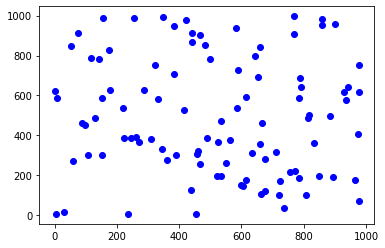

In [35]:
fig, ax = plt.subplots()
ax.scatter(points[0], points[1], color="blue")
plt.show()

In [36]:
groups = points.T[:2]
distance_arr = np.zeros(points.shape, dtype=float).T
classflication = None

In [37]:
def display_k_means_current(_point, _groups, title=""):
  fig, ax = plt.subplots()
  if classflication is not None:
    for idx, p in enumerate(_point.T):
      ax.scatter(p[0], p[1], color="red" if classflication[idx] == 0 else "blue")
  else:
    ax.scatter(_point[0], _point[1], color="gray")
  ax.scatter(_groups.T[0][0], _groups.T[1][0], color="red", marker="^")
  ax.scatter(_groups.T[0][1], _groups.T[1][1], color="blue", marker="^")
  plt.title(title)
  plt.show()

In [38]:
def calculate_all_distance(_points):
  def distance(p0, p1):
    return math.sqrt(pow(p0[0] - p1[0], 2) + pow(p0[1] - p1[1], 2))

  result_arr = np.zeros(points.shape, dtype=float).T
  for idx in range(len(result_arr)):
    result_arr[idx][0] = distance(groups[0], _points.T[idx])
    result_arr[idx][1] = distance(groups[1], _points.T[idx])

  return result_arr

In [39]:
def calculate_new_group(_points, _classflication):
  result = np.asarray([[0, 0],
                       [0, 0]], dtype=float)
  counter = np.asarray([0, 0], dtype=int)
  for idx, group_id in enumerate(_classflication.T):
    result[group_id][0] += _points[0][idx]
    result[group_id][1] += _points[1][idx]
    counter[group_id] += 1

  if counter[0] == 0:
    result[0] = groups[0]
    counter[0] = 1
  elif counter[1] == 0:
    result[1] = groups[1]
    counter[1] = 1

  result[0] = result[0] / counter[0]
  result[1] = result[1] / counter[1]

  return result

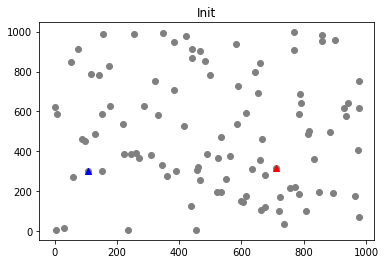

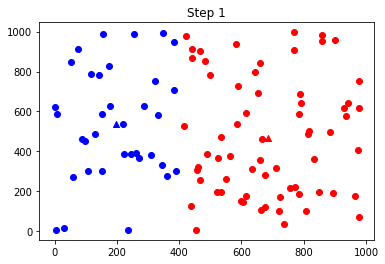

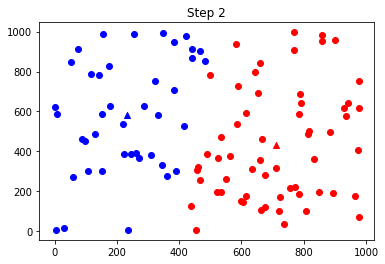

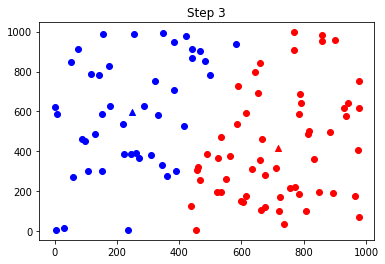

In [40]:
classflication_prev = np.asarray([])
display_k_means_current(points, groups, title=f"Init")
for i in range(10):
  distance_arr = calculate_all_distance(points)
  classflication = np.argmin(distance_arr, axis=1)
  if classflication_prev is not None:
    if np.array_equal(classflication, classflication_prev):
      break
  groups = calculate_new_group(points, classflication)
  display_k_means_current(points, groups, title=f"Step {i + 1}")
  classflication_prev = classflication